In [2]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('breast-cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df = data.copy()
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 32)

In [7]:
df.drop(['id'],axis=1, inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df['diagnosis'] = df['diagnosis'].astype('int64')

In [10]:
columns_to_normalize = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [27]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,0.622320,0.626987,0.604036,0.474019,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,0.455251,0.621238,0.445788,0.303118,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,0.644564,0.663510,0.665538,0.475716,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis']

In [13]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.15, random_state = 42)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [15]:
def lossFunc(x, y, v, w):
    m, n = len(x), len(v)
    cost = 0.0
    for i in range(m):
        h_i = []
        for j in range(n):
            h_i.append(sigmoid(v[j].dot(x[i])))
        fw = sigmoid(w.dot(h_i))
        cost += (fw-y[i])**2
    return cost/m

In [16]:
def gradientFunction_w(x, y, v, w, ind): 
    m, n = len(x), len(v)
    grad = 0 
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(v[j].dot(x[i]))
        fw = sigmoid(z_i)
        grad += 2*(fw - y[i])*fw*(1-fw)*sigmoid(v[ind].dot(x[i])) 
    return grad/m

In [17]:
def gradientFunction_v(x, y, v, w, ind): 
    m, n = len(x), len(v)
    grad = 0
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(np.dot(v[j],x[i]))
        fw = sigmoid(z_i)
        grad += 2*(fw - y[i])*fw*(1-fw)*w[ind]*sigmoid(v[ind].dot(x[i]))*(1-sigmoid(v[ind].dot(x[i])))*x[i] 
    return grad/m

In [18]:
def gradientDescent(x, y, v, w, eta=0.1, iterations=1000): 
    loss_history = []
    for i in range(iterations):
        grad_w = []
        for j in range(len(v)):
            grad_w.append(gradientFunction_w(x, y, v, w, j))
        w -= eta * np.array(grad_w)
        
        grad_v = []
        for j in range(len(v)):
            grad_v.append(gradientFunction_v(x, y, v, w, j))    
        v = v.astype('float')
        v -= eta * np.array(grad_v)

        loss_history.append(lossFunc(x, y, v, w))

        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Loss {loss_history[-1]}")
    return v, w, loss_history

In [19]:

x = X.values
y = Y.values
d = x.shape[1]

v = np.empty(shape=(2,d))
v.fill(0)
w = np.zeros(len(v))

V, W, f = gradientDescent(x, y, v, w, 0.01, 1000)

Iteration    0: Loss 0.24997945608664074
Iteration  100: Loss 0.24492613445104144
Iteration  200: Loss 0.24055814538538572
Iteration  300: Loss 0.23793586020378182
Iteration  400: Loss 0.2363459423444581
Iteration  500: Loss 0.23537410757788194
Iteration  600: Loss 0.2347750490744668
Iteration  700: Loss 0.23440286180269398
Iteration  800: Loss 0.2341700106429028
Iteration  900: Loss 0.23402345457526028


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


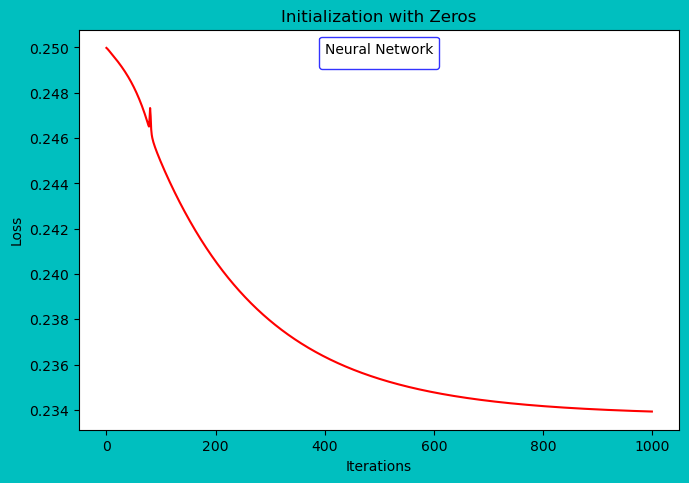

In [29]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Initialization with Zeros')
plt.plot(np.arange(1000),f,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

In [20]:
w = np.random.rand(len(v))
v = np.empty(shape=(2,d))
v.fill(np.random.rand())
V, W, f1 = gradientDescent(x, y, v, w, 0.01, 1000)

Iteration    0: Loss 0.39980306413549876
Iteration  100: Loss 0.35999854260661385
Iteration  200: Loss 0.3224310094119934
Iteration  300: Loss 0.29188174861772126
Iteration  400: Loss 0.27011152208425715
Iteration  500: Loss 0.25596309515796656
Iteration  600: Loss 0.24722638970013971
Iteration  700: Loss 0.2419463317799797
Iteration  800: Loss 0.23876906915914245
Iteration  900: Loss 0.23684916293629887


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


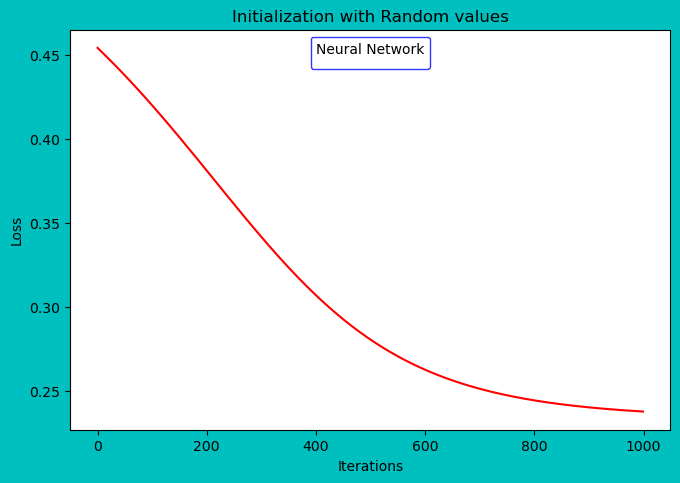

In [31]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Initialization with Random values')
plt.plot(np.arange(1000),f1,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

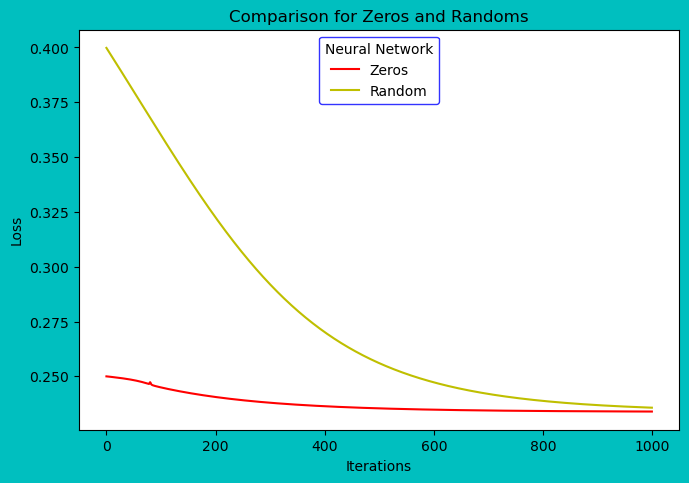

In [21]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Comparison for Zeros and Randoms')
plt.plot(np.arange(1000),f,color='r')
plt.plot(np.arange(1000),f1,color='y')
plt.legend(['Zeros','Random'],facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

In [22]:
w = np.random.rand(len(v))
v = np.empty(shape=(2,d))
v.fill(np.random.rand())
V, W, f1 = gradientDescent(x, y, v, w, 0.1, 1000)
V, W, f2 = gradientDescent(x, y, v, w, 0.05, 1000)
V, W, f3 = gradientDescent(x, y, v, w, 0.01, 1000)
V, W, f4 = gradientDescent(x, y, v, w, 0.005, 1000)
V, W, f5 = gradientDescent(x, y, v, w, 0.001, 1000)

Iteration    0: Loss 0.3909253889417253
Iteration  100: Loss 0.23541638576890583
Iteration  200: Loss 0.23378225373304276
Iteration  300: Loss 0.2337652342832346
Iteration  400: Loss 0.23376503282640798
Iteration  500: Loss 0.23376503040680563
Iteration  600: Loss 0.23376503037769955
Iteration  700: Loss 0.23376503037735125
Iteration  800: Loss 0.23376503037734506
Iteration  900: Loss 0.23376503037734456
Iteration    0: Loss 0.2337650303773446
Iteration  100: Loss 0.233765030377347
Iteration  200: Loss 0.2337650303773448
Iteration  300: Loss 0.2337650303773467
Iteration  400: Loss 0.2337650303773437
Iteration  500: Loss 0.2337650303773478
Iteration  600: Loss 0.233765030377345
Iteration  700: Loss 0.2337650303773465
Iteration  800: Loss 0.233765030377347
Iteration  900: Loss 0.23376503037734475
Iteration    0: Loss 0.2337650303773459
Iteration  100: Loss 0.2337650303773459
Iteration  200: Loss 0.2337650303773459
Iteration  300: Loss 0.2337650303773459
Iteration  400: Loss 0.23376503037

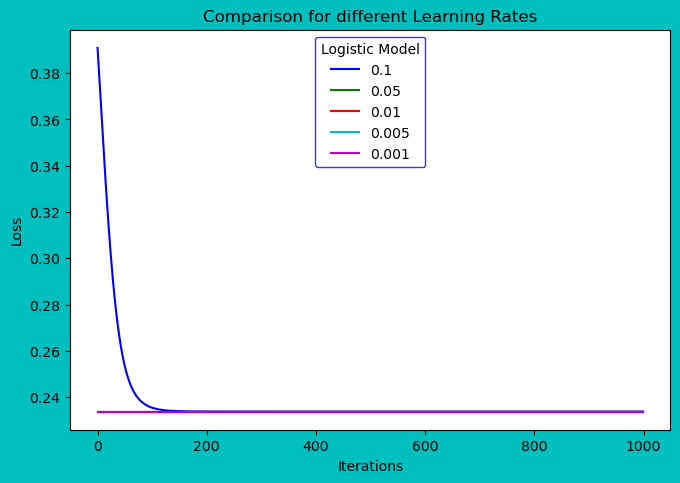

In [23]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Comparison for different Learning Rates')
plt.plot(np.arange(1000),f1,color='b')
plt.plot(np.arange(1000),f2,color='g')
plt.plot(np.arange(1000),f3,color='r')
plt.plot(np.arange(1000),f4,color='c')
plt.plot(np.arange(1000),f5,color='m')
plt.legend(['0.1','0.05', '0.01', '0.005', '0.001'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')